In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()

sales_data = [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 15000),
    ("Laptop", 3, 50000),
    ("Mobile", 6, 20000)
]

cursor.executemany(
    "INSERT INTO sales VALUES (?, ?, ?)",
    sales_data
)

conn.commit()

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df



,product,total_qty,revenue
0,Laptop,40,2000000.0
1,Mobile,80,1600000.0
2,Tablet,35,525000.0


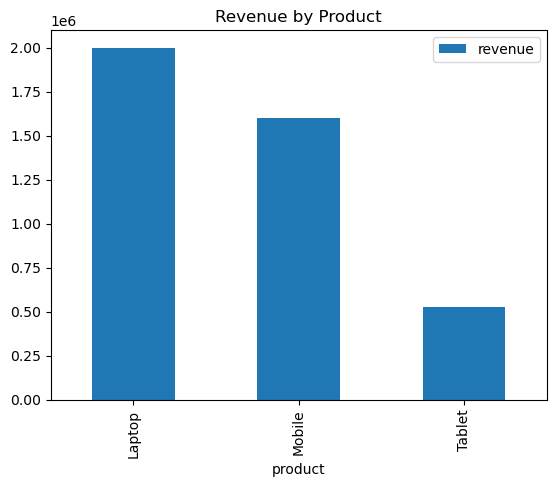

In [7]:
df.plot(kind="bar", x="product", y="revenue", title="Revenue by Product")
plt.show()

conn.close()